# Collobarative Filtering

In [43]:
import pandas as pd
from scipy.spatial.distance import cosine
import numpy as np
import scipy.sparse as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn
import pylab
import os

In [44]:
data = pd.read_csv('u.data', sep='\t', header = None, names = ['user_id', 'movie_id', 'rating', 'timestamp'], encoding='latin-1')
data.head(6)
data['movie_id'] = data['movie_id'] - 1

m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movie_data = pd.read_csv('u.item', sep='|', names=m_cols, usecols=range(5), encoding='latin-1')

#  Lodas Movie Data
movie_data['movie_id'] = movie_data['movie_id'] -1

# Load data on users
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('u.user', sep='|', names=u_cols,encoding='latin-1')

# create one merged DataFrame
movie_ratings = pd.merge(movie_data, data)
lens = pd.merge(movie_ratings, users)


In [45]:
# Take a look on the merged dataset
lens.head(5)

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,timestamp,age,sex,occupation,zip_code
0,0,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,3,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,4,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,6,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,7,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


In [46]:
# Group by movie title: frequency of movie titles in descending order
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:25]

most_rated.head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
dtype: int64

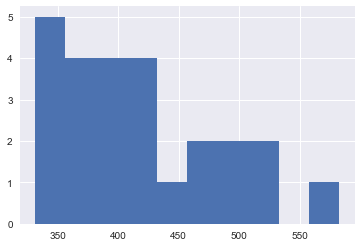

In [47]:
most_rated.hist()

In [33]:
all_most_rated = lens.groupby('title').size().sort_values(ascending=False)

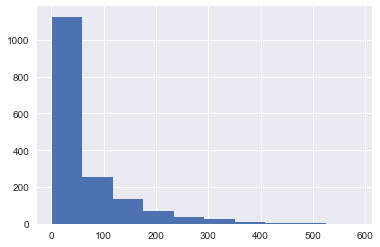

In [34]:
all_most_rated.hist()

In [35]:
all_most_rated.head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
dtype: int64

In [48]:
rank = np.arange(all_most_rated.size)

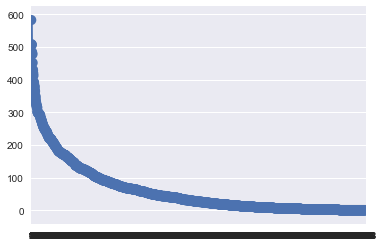

In [49]:
sns.pointplot(rank, all_most_rated)

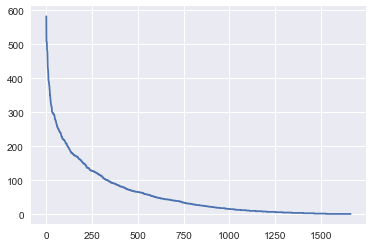

In [50]:
plt.plot(rank, all_most_rated)

In [52]:
plt.show()

In [53]:
data.head(6)

,user_id,movie_id,rating,timestamp
0,196,241,3,881250949
1,186,301,3,891717742
2,22,376,1,878887116
3,244,50,2,880606923
4,166,345,1,886397596
5,298,473,4,884182806


In [56]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

Problem here: best ratings are ratings made by one person only...

In [61]:
# sort by rating average
movie_stats.sort_values([('rating', 'mean')], ascending=False).head(10)

rating     
                                                    size mean
title                                                        
They Made Me a Criminal (1939)                         1  5.0
Marlene Dietrich: Shadow and Light (1996)              1  5.0
Saint of Fort Washington, The (1993)                   2  5.0
Someone Else's America (1995)                          1  5.0
Star Kid (1997)                                        3  5.0
Great Day in Harlem, A (1994)                          1  5.0
Aiqing wansui (1994)                                   1  5.0
Santa with Muscles (1996)                              2  5.0
Prefontaine (1997)                                     3  5.0
Entertaining Angels: The Dorothy Day Story (1996)      1  5.0

... threrefore we look only at movies rated at lest by 100 users...

In [64]:
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:20]

rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000
Citizen Kane (1941)                                   198  4.292929
To Kill a Mockingbird (1962)                          219  4.292237
One Flew Over the Cuckoo's Nest (1975)                264  4.291667
Silence of the Lambs, The (1991)                      390  4.289744
North by Northwest (1959)                             179  4.284916
Godfather, The (1972)                                 413  4.283293
Secrets & Lies (1996)                                 162  4.265432
Good Will Hunting (1997)                              198  4.262626
Manchurian Candidate, The (1962)                      131  4.259542
Dr. Strangelove or: How I Learned to Stop Worry...    194  4.252577
Raiders of the Lost Ark (1981)                        420  4.252381

Now we try to create a recomendation system. First we define some helper functions:

In [66]:
# prediction function
def predict(user1, users, top_similarities):
    scores = np.zeros((users.shape[1],))

    for i in range(users.shape[1]):
        if i not in user1.nonzero()[1] and i in np.nonzero(users.getnnz(0))[0]:

            users_seen_the_movie = np.nonzero(users[:,i].getnnz(1))[0]
            for j in users_seen_the_movie:
                scores[i] += top_similarities[j] * (users[j,i] - users[j,:].mean())

            scores[i] =  user1.mean() + scores[i]/(sum(abs(top_similarities[users_seen_the_movie])))

    return scores



def pearson_correlation(user1, user2):

    norm_user2 = sum((np.array(user2.data[0]) - user2.mean())**2)
    norm_user1 = sum((np.array(user1.data[0]) - user1.mean())**2)
    normalization = np.sqrt(norm_user1 * norm_user2)
    common = set(user1.nonzero()[1]).intersection(user2.nonzero()[1])
    pearson_sum = 0

    for i in common:
        pearson_sum += (user1[:,i].data[0][0] - user1.mean()) * (user2[:,i].data[0][0] - user2.mean())

    return pearson_sum/normalization


def to_sparse_matrix(data_file):
    users = data.ix[:,0].unique()
    users = users[users.argsort()]
    movies = data.ix[:,1].unique()
    movies = movies[movies.argsort()]

    number_of_rows = len(users)
    number_of_columns = len(movies)

    movie_indices, user_indices = {}, {}

    for i in range(len(movies)):
        movie_indices[movies[i]] = i

    for i in range(len(users)):
        user_indices[users[i]] = i

    #scipy sparse matrix to store the 1M matrix
    V = sp.lil_matrix((number_of_rows, number_of_columns))

    #adds data into the sparse matrix
    for index,row in data_file.iterrows():
        u, i , r  = row[0], row[1], row[2]
        V[user_indices[u], movie_indices[i]] = r

    return V #V.tocsr()

def matrix_factorization(R, P, Q, K, epochs=5000, eta=0.0002, beta=0.02):
    Q = Q.T
    for epoch in range(epochs):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    P[i,:] = P[i,:] + eta * (2 * eij * Q[:,j] - beta * P[i,:])
                    Q[:,j] = Q[:,j] + eta * (2 * eij * P[i,:] - beta * Q[:,j])
        #eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    e = e + (beta/2) * ( sum(P[i,:]**2) + sum(Q[:,j]**2) )
        if e < 0.001:
            break
    return P, Q.T


Now: 

1. We define a sparse matrix of users and movies

In [70]:
# convert rating data into sparse user-item matrix
Y = to_sparse_matrix(data)
#compute similarity between two users
pearson_correlation(Y[1,:], Y[2,:])

0.10884484412185715

In [73]:
# pick a user
user1 = Y[1,:]

Now we compute pearson correlations with the first user with all other users

In [74]:
# compute pearson_correlation over all users
similarities = np.zeros((Y.shape[0],))
for i in range(Y.shape[0]):
    similarities[i] = pearson_correlation(user1, Y[i,:])

Now we pick the last 30 values (which are the highest similarity scores):

In [76]:
# find top 30 most similar users
top_similar_indexes = similarities.argsort()[-31:-1]
users = Y[top_similar_indexes,:]
top_similarities = similarities[top_similar_indexes]
top_similarities.size

30

In [77]:
# get rating prediction based in these 30 similar users
predicted_ratings = predict(user1, users, top_similarities)

In [79]:
# top 10 highest movie rating predictions
top_10_index = predicted_ratings.argsort()[::-1][:15]

movie_data
movie_data.loc[movie_data['movie_id'].isin(top_10_index)]

,movie_id,title,release_date,video_release_date,imdb_url
47,47,Hoop Dreams (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Hoop%20Dreams...
55,55,Pulp Fiction (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Pulp%20Fictio...
172,172,"Princess Bride, The (1987)",01-Jan-1987,NaN,http://us.imdb.com/M/title-exact?Princess%20Br...
179,179,Apocalypse Now (1979),01-Jan-1979,NaN,http://us.imdb.com/M/title-exact?Apocalypse%20...
434,434,Butch Cassidy and the Sundance Kid (1969),01-Jan-1969,NaN,http://us.imdb.com/M/title-exact?Butch%20Cassi...
468,468,Short Cuts (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Short%20Cuts%...
497,497,"African Queen, The (1951)",01-Jan-1951,NaN,http://us.imdb.com/M/title-exact?African%20Que...
509,509,"Magnificent Seven, The (1954)",01-Jan-1954,NaN,http://us.imdb.com/M/title-exact?Shichinin%20n...
513,513,Annie Hall (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Annie%20Hall%...
535,535,Ponette (1996),23-May-1997,NaN,http://us.imdb.com/M/title-exact?Ponette%20%28...


Lets take a look on the gender of the user:

In [82]:
# not possible since we overwrote the users data

In [85]:
# ratings for the top 10 highest predicted movies
predicted_ratings[top_10_index]

Y_movies = Y.transpose()

#pick a movie
movie179 = Y_movies[179,:]
movie_similarities = np.zeros((Y_movies.shape[0],))


for i in range(Y_movies.shape[0]):
    movie_similarities[i] = pearson_correlation(movie179, Y_movies[i,:])

movie_data.loc[movie_data['movie_id'].isin(top_sim_movies)]


R = [
         [5,3,0,1],
         [4,0,0,1],
         [1,1,0,5],
         [1,0,0,4],
         [0,1,5,4],
        ]



In [84]:
# check whether R is a Matrix
R = np.array(R)

N = len(R)
M = len(R[0])
K = 2

# Initialization of the Matrix factorization
P = np.random.rand(N,K)
Q = np.random.rand(M,K)

nP, nQ = matrix_factorization(R, P, Q, K)

np.dot(nP[0,:], nQ[0,:])

NameError: name 'R' is not defined